In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [46]:
hotel_data = pd.read_csv('hotel_booking.csv')
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [47]:
hotel_data.fillna({'children': np.median(hotel_data.children), 'country': 'Unknown', 'agent': np.median(hotel_data.agent), 'company': np.median(hotel_data.company)}, inplace=True)

hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [48]:
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1


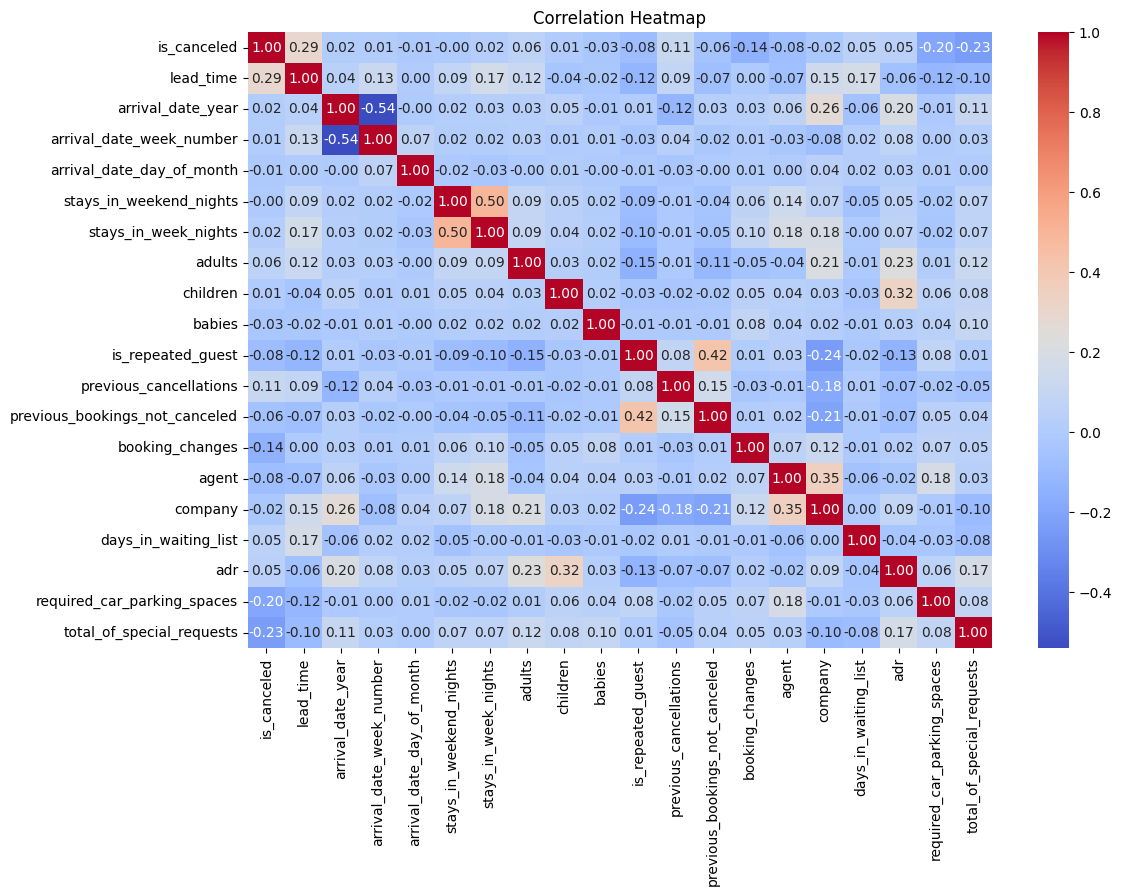

In [68]:
numeric_df = hotel_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
# plt.show()
numeric_df.head()

In [83]:
features = ["lead_time", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month", "children", "babies", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "required_car_parking_spaces", "total_of_special_requests", "adr", "days_in_waiting_list", "company"]
X = hotel_data[features]
Y = hotel_data.is_canceled

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = RandomForestClassifier(warm_start=True)

parameters = {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': range(10, 201, 10), 'max_depth': range(1, 26), 'min_samples_split': range(10, 1501, 50), 'min_samples_leaf': range(10, 1501, 50)}
grid_search_rf = RandomizedSearchCV(clf, param_distributions=parameters, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(warm_start=True), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 26),
                                        'min_samples_leaf': range(10, 1501, 50),
                                        'min_samples_split': range(10, 1501, 50),
                                        'n_estimators': range(10, 201, 10)})

In [84]:
best_rf = grid_search_rf.best_estimator_
#best_rf.set_params(n_estimators=100)
#best_rf.get_params()

In [85]:
best_rf.score(X_test, y_test)

0.7782431026168177

In [66]:
predict = best_rf.predict(X_test)
f1_score(y_pred=predict, y_true=y_test)

np.float64(0.6679284494915757)

In [67]:
confusion_matrix(y_true=y_test, y_pred=predict)

array([[21452,  3302],
       [ 5646,  8999]])

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

dtclf = DecisionTreeClassifier()
# parameters_dt = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 11), 'min_samples_split': range(10, 1501, 50), 'min_samples_leaf': range(10, 1501, 50)}
# grid_search_dt = RandomizedSearchCV(dtclf, param_distributions=parameters_dt, n_jobs=-1)
dtclf.fit(X_iris, y_iris)

DecisionTreeClassifier()

In [29]:
#best_dt = grid_search_dt.best_estimator_

ValueError: Per-column arrays must each be 1-dimensional

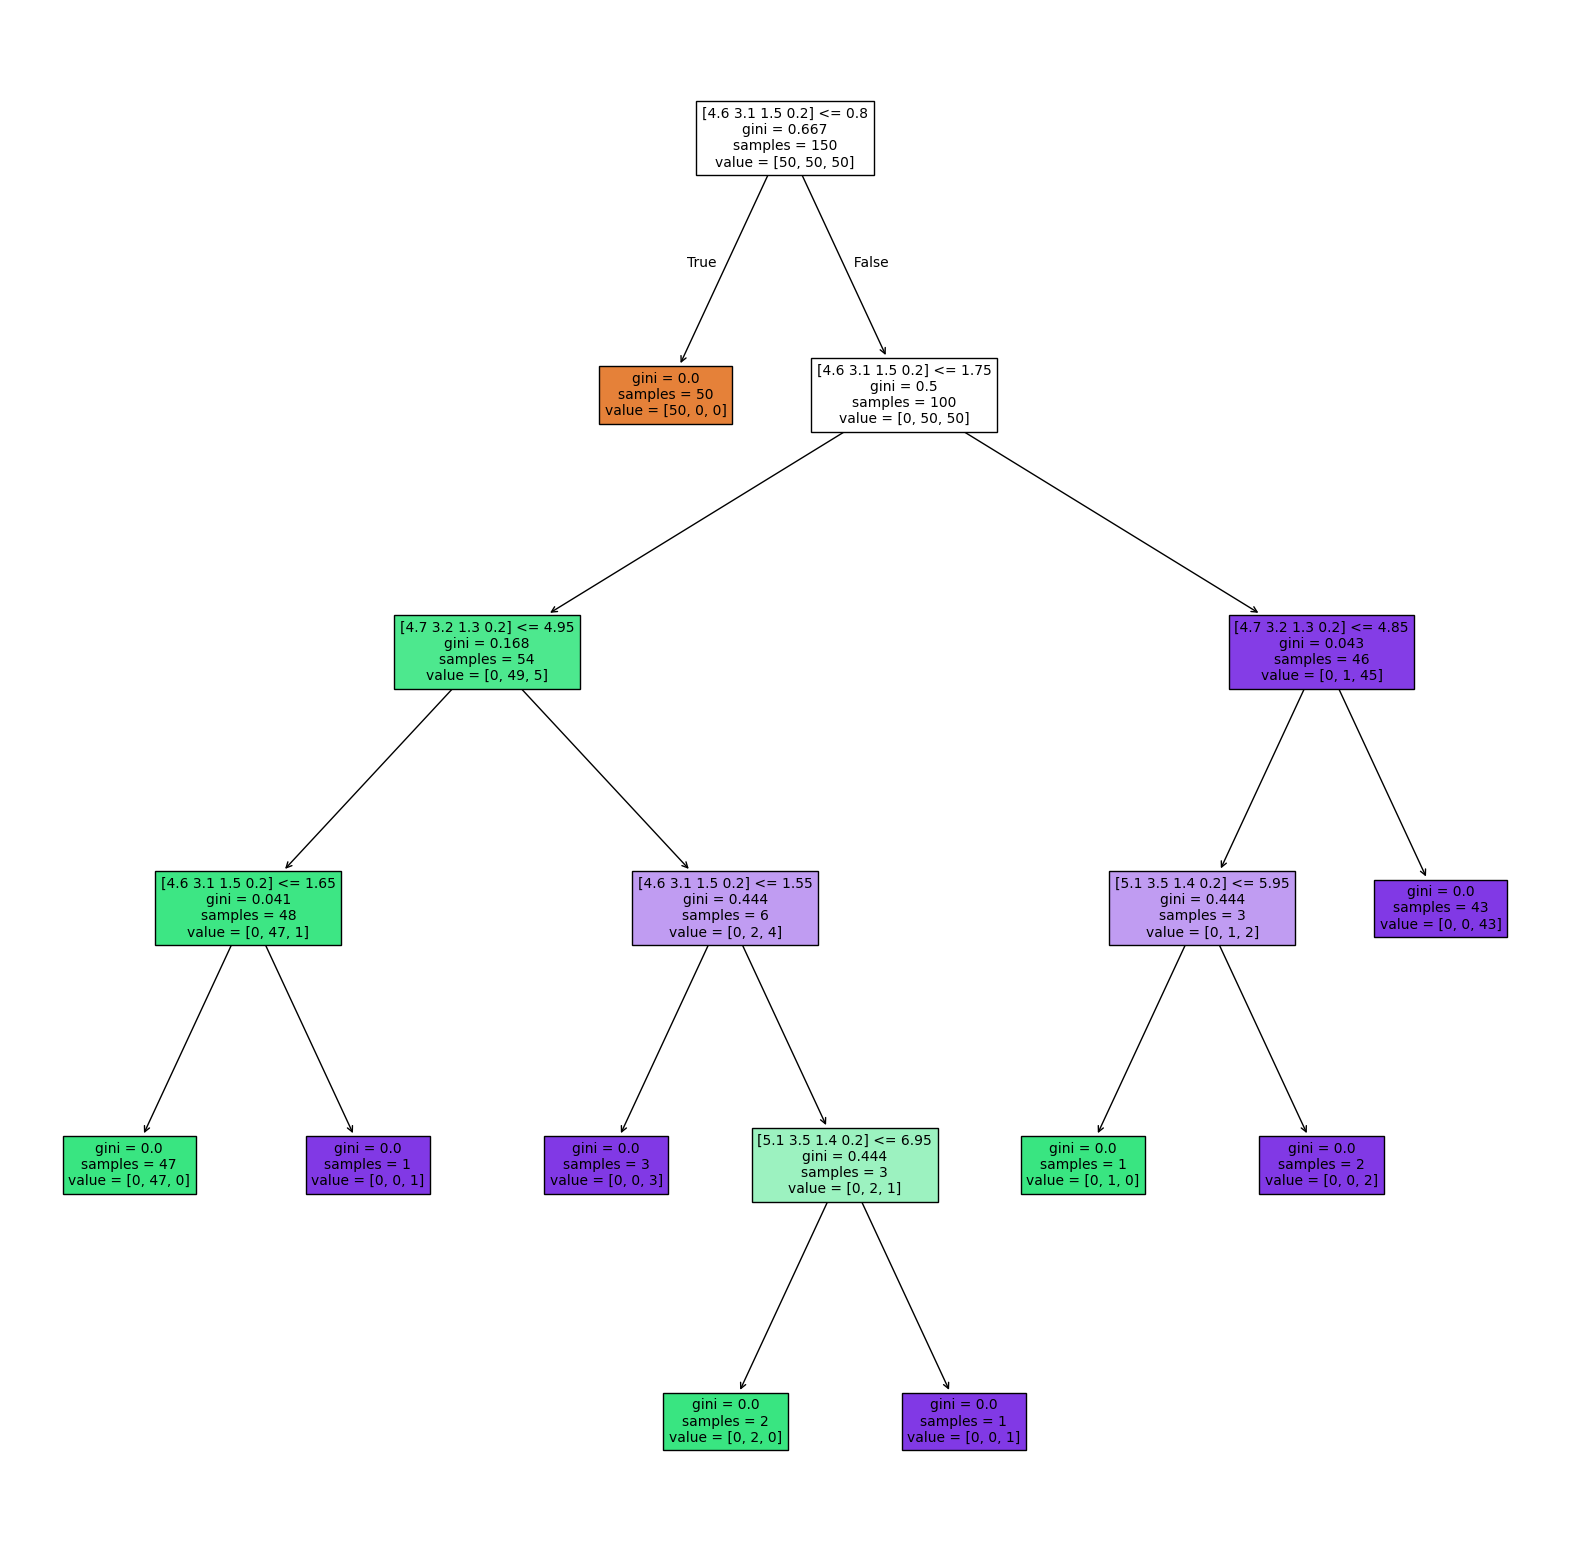

In [27]:
fig = plt.figure(figsize=(20, 20))
plot_tree(dtclf, filled=True, fontsize=10, feature_names=list(X_iris))
fig.savefig("decistion_tree.png")